In [1]:
using PyPlot
using PorousMaterials

┌ Info: Precompiling PorousMaterials [68953c7c-a3c7-538e-83d3-73516288599e]
└ @ Base loading.jl:1273
  ** incremental compilation may be fatally broken for this module **

┌ Warning: Package PorousMaterials does not have PyCall in its dependencies:
│ - If you have PorousMaterials checked out for development and have
│   added PyCall as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with PorousMaterials
└ Loading PyCall into PorousMaterials from project dependency, future warnings for PorousMaterials are suppressed.


In [2]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# plt.style.use('ggplot')
# import numpy as np

In [2]:
PyPlot.matplotlib.style.use("ggplot")

In [4]:
xtal_experiment = Crystal("NiPyC2_experiment.cif")
xtal_relaxed = Crystal("NiPyC2_vc-relax.cif")

┌ Info: Crystal NiPyC2_experiment.cif has Pn space group. I am converting it to P1 symmetry.
│         To afrain from this, pass `convert_to_p1=false` to the `Crystal` constructor.
└ @ PorousMaterials /home/ng/.julia/dev/PorousMaterials/src/crystal.jl:405


Name: NiPyC2_vc-relax.cif
Bravais unit cell of a crystal.
	Unit cell angles α = 90.000000 deg. β = 91.370820 deg. γ = 90.000000 deg.
	Unit cell dimensions a = 6.798460 Å. b = 10.761410 Å, c = 11.188340 Å
	Volume of unit cell: 818.316049 Å³

	# atoms = 54
	# charges = 0
	chemical formula: Dict(:C10 => 1,:C22 => 1,:H3 => 1,:C13 => 1,:H13 => 1,:H4 => 1,:C16 => 1,:C14 => 1,:H1 => 1,:C19 => 1…)
	space Group: P1
	symmetry Operations:
		'x, y, z'


In [20]:
xtal_relaxed.box.Ω

818.3160488183514

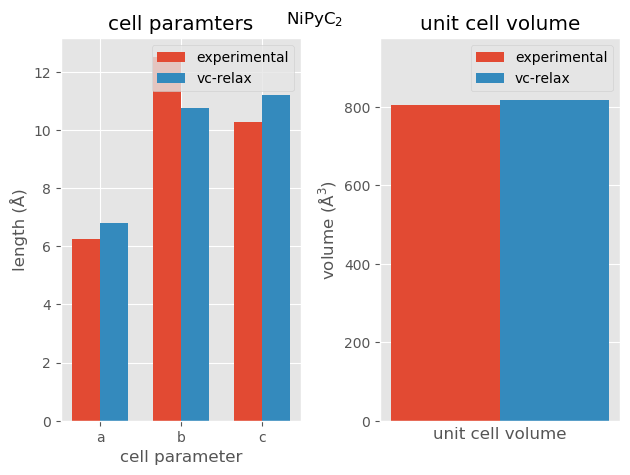

In [37]:
N = 3
# experimental
experimental_lattice_constants = (xtal_experiment.box.a, 
    xtal_experiment.box.b, xtal_experiment.box.c)

# vc-relax (Å)
simulated_lattice_constants = (xtal_relaxed.box.a, 
    xtal_relaxed.box.b, xtal_relaxed.box.c)

fig, axs = plt.subplots(1, 2)
ind = collect(1:N) 
width = 0.35       
axs[1].bar(ind, experimental_lattice_constants, width, label="experimental")
axs[1].bar(ind .+ width, simulated_lattice_constants, width,
    label="vc-relax")

axs[1].set_ylabel("length (Å)")
axs[1].set_xlabel("cell parameter")
axs[1].set_title("cell paramters")

axs[1].set_xticks(ind .+ width / 2)
axs[1].set_xticklabels(["a", "b", "c"])
axs[1].legend(loc="best")

ind = collect(1:1)
axs[2].bar(ind, xtal_experiment.box.Ω, width, label="experimental")
axs[2].bar(ind .+ width, xtal_relaxed.box.Ω, width,
    label="vc-relax")

axs[2].set_ylim(ymax=975)
axs[2].set_xticks([])
axs[2].set_ylabel(L"volume (Å$^3$)")
axs[2].set_xlabel("unit cell volume")
axs[2].set_title("unit cell volume")
axs[2].legend(loc="best")


suptitle(L"NiPyC$_2$")
tight_layout()
# axs[1].show()

In [ ]:
# 34544 CELL_PARAMETERS (angstrom)
# 34545    6.798447484   0.000000000  -0.012279787
# 34546    0.000000000  10.761407086   0.000000000
# 34547   -0.247454664   0.000000000  11.185601308



# lattice parameter (alat)  =      11.8161  a.u.

# 34645      crystal axes: (cart. coord. in units of alat)
# 34646                a(1) = (   1.087265   0.000000  -0.001964 )
# 34647                a(2) = (   0.000000   1.721054   0.000000 )
# 34648                a(3) = (  -0.039575   0.000000   1.788895 )


In [4]:
# 0.529177 # bohr to ang 

6.7984596703365705